In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('books.csv', error_bad_lines = False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [75]:
df.shape

(13714, 10)

In [76]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

In [77]:
df.index = df.bookID

In [78]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [79]:
df.authors.unique()

array(['J.K. Rowling-Mary GrandPré', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'Neil Gaiman-Michael Reaves',
       'Brian Froud-Jessica Macbeth', 'Brian Froud'], dtype=object)

In [80]:
df.replace(to_replace = 'J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling',
          inplace = True)

In [81]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,0439785960,9780439785969,eng,652,1944099,26249
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,1996446,27613
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,043965548X,9780439655484,eng,435,2149872,33964


Text(0.5, 1.0, ' 20 Most Occurring Books')

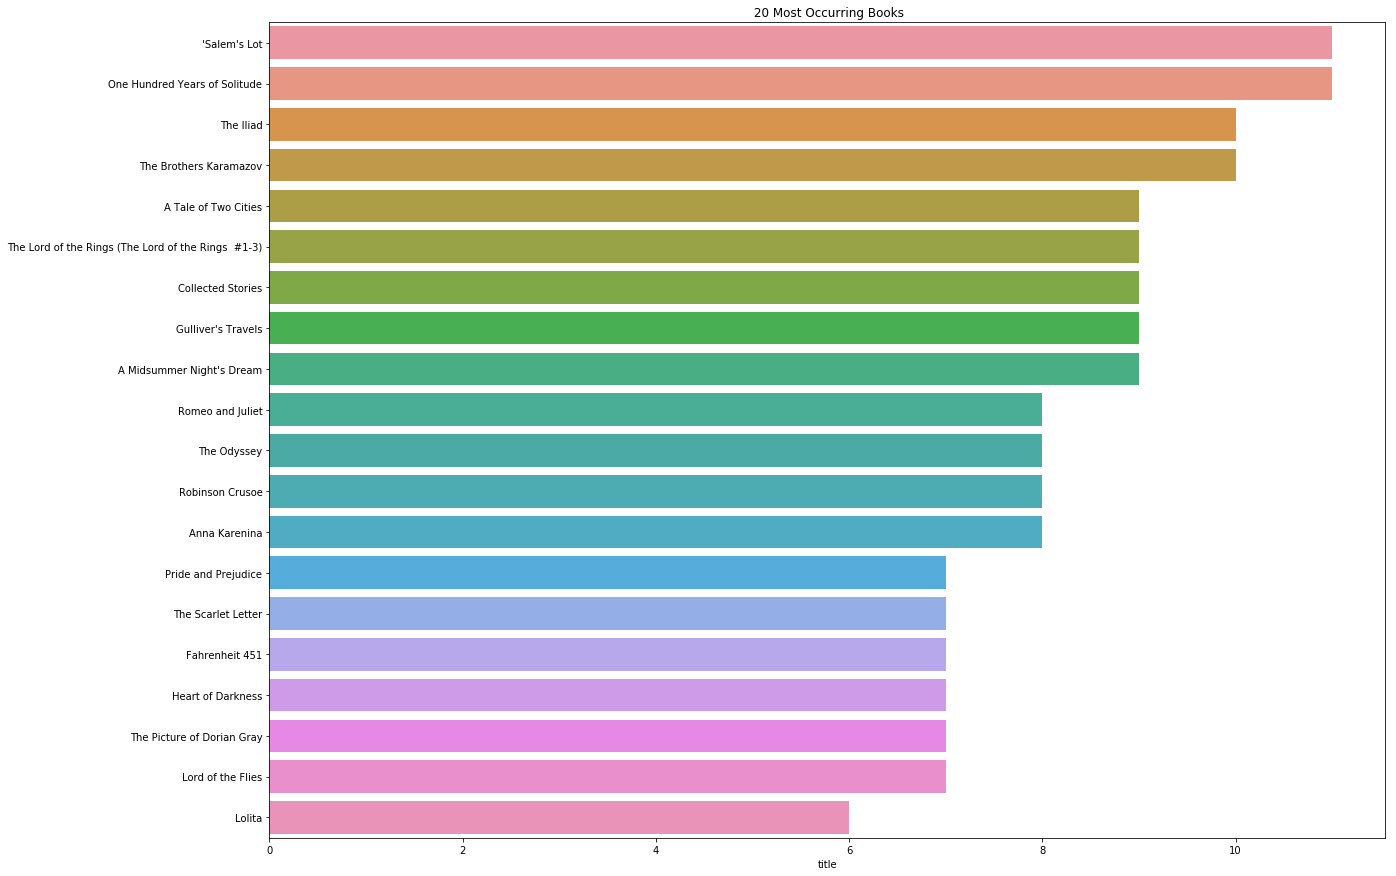

In [82]:
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:20]
sns.barplot(x = books, y = books.index)
plt.title(" 20 Most Occurring Books")

Text(0.5, 1.0, 'Language Distribution')

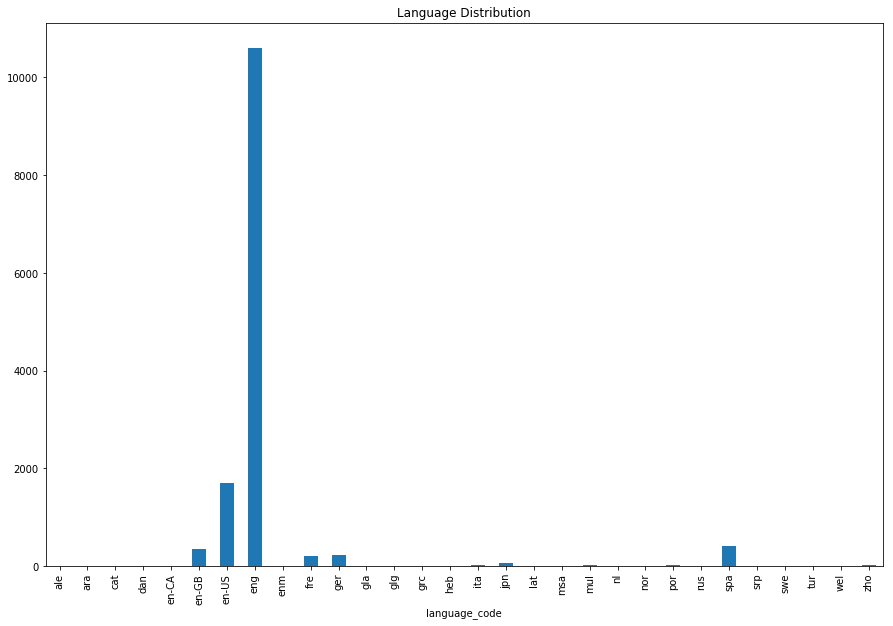

In [57]:
plt.figure(figsize = (15, 10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Distribution')

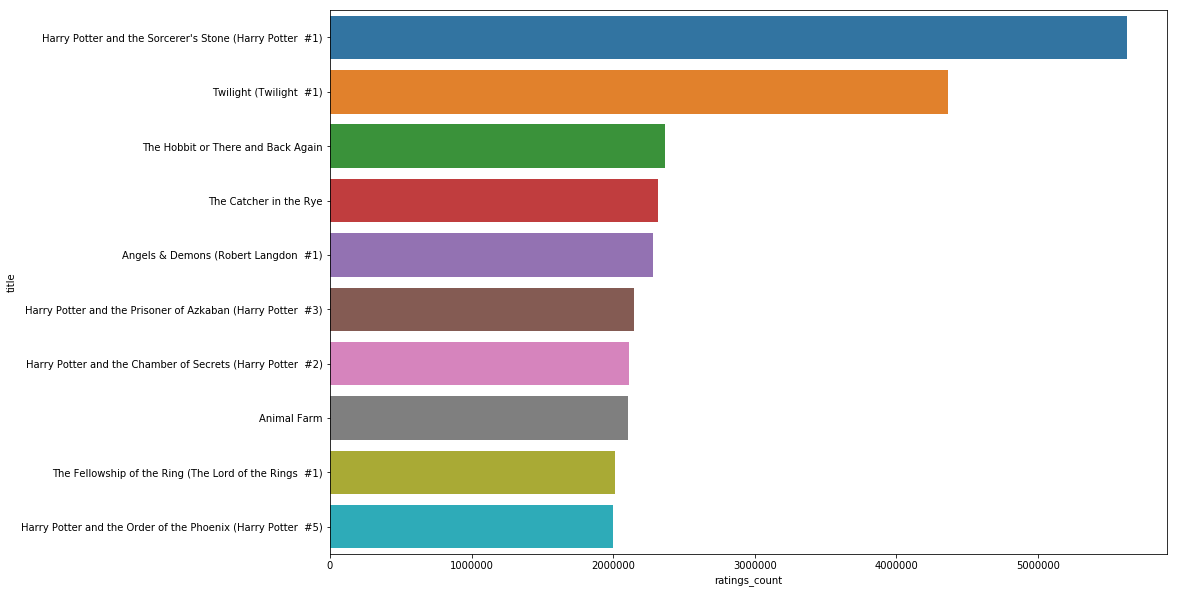

In [58]:
most_rat = df.sort_values('ratings_count', ascending = False).head(10)
plt.figure(figsize = (15, 10))
sns.barplot(most_rat['ratings_count'], most_rat.title)

Text(0.5, 1.0, 'Authors and Books')

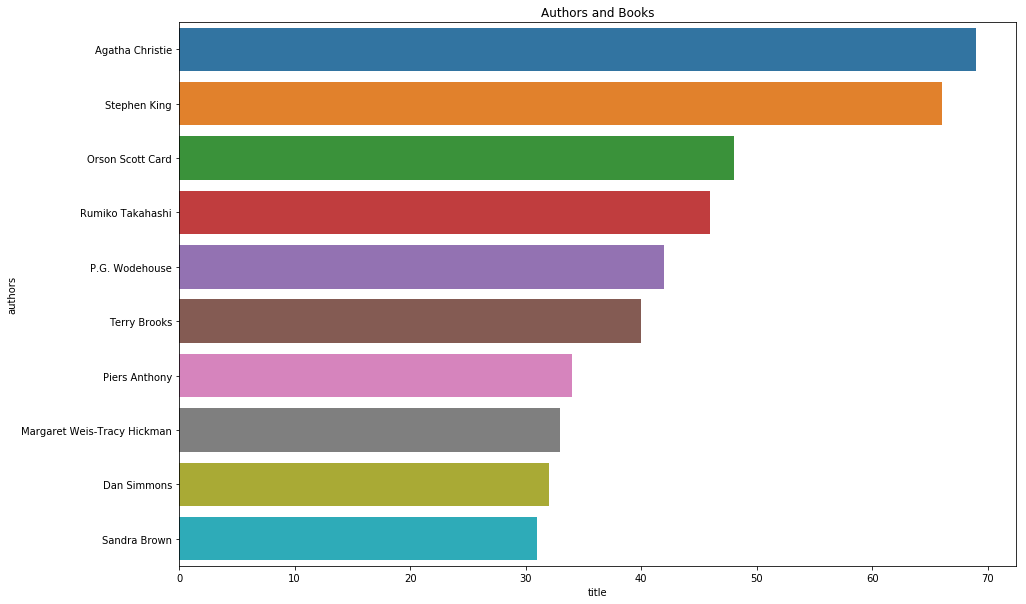

In [59]:
mst_bks = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10)
plt.figure(figsize = (15, 10))
ax = sns.barplot(mst_bks['title'], mst_bks.authors)
ax.set_title('Authors and Books')

Text(0, 0.5, 'Authors')

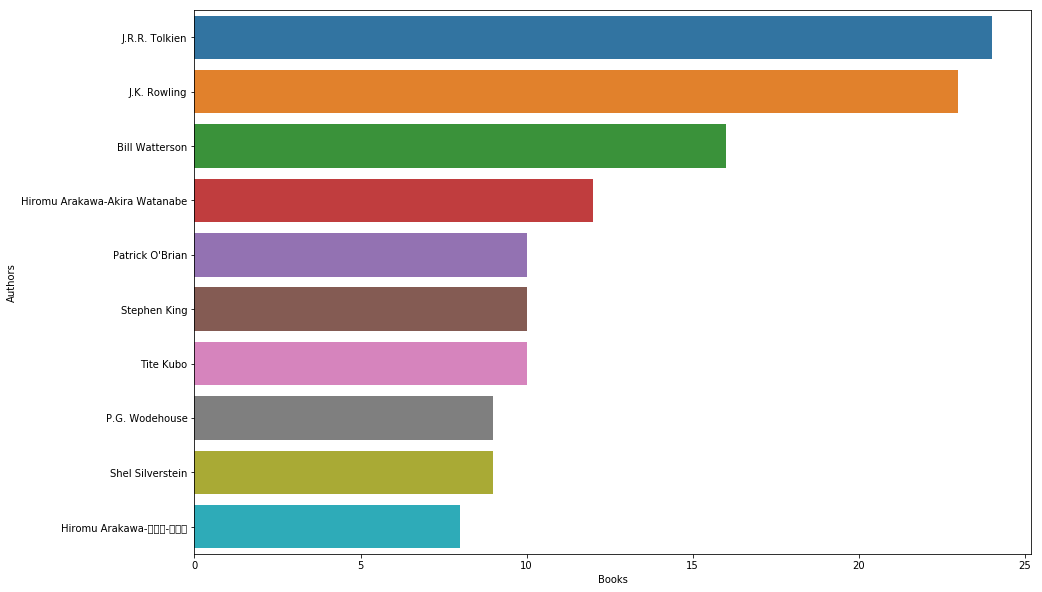

In [60]:
hi_rat_auth = df[df['average_rating'] >= 4.3]
hi_rat_auth = hi_rat_auth.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10)
plt.figure(figsize = (15, 10))
ax = sns.barplot(hi_rat_auth['title'], hi_rat_auth.authors)
ax.set_xlabel('Books')
ax.set_ylabel('Authors')

In [61]:
df.average_rating.isnull().value_counts()

False    13714
Name: average_rating, dtype: int64

In [62]:
df = df.dropna(0)

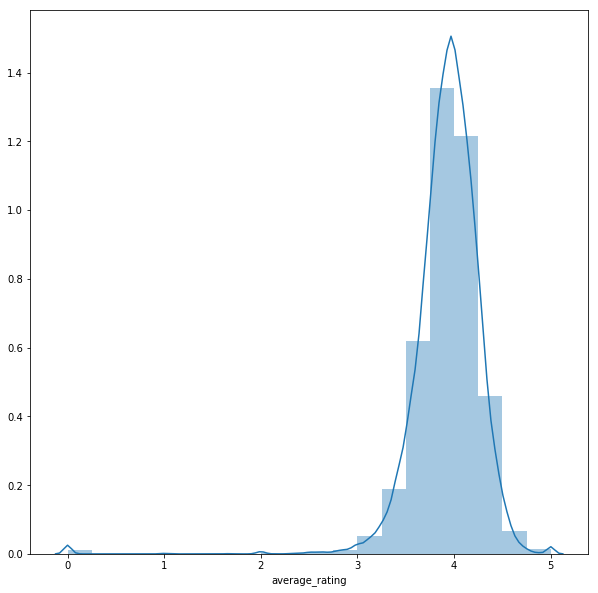

In [63]:
plt.figure(figsize = (10, 10))
rat = df.average_rating.astype(float)
sns.distplot(rat, bins = 20)

<Figure size 1080x720 with 0 Axes>

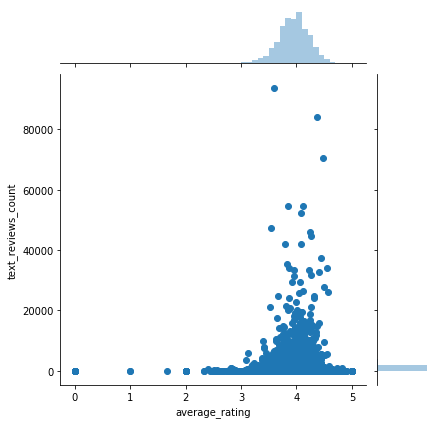

In [64]:
plt.figure(figsize = (15, 10))
df = df.dropna(0)
ax = sns.jointplot(x = 'average_rating', y = 'text_reviews_count',
                  kind = 'scatter', data = df[['text_reviews_count', 'average_rating']])

In [65]:
tri = df[~(df['text_reviews_count'] > 5000)]

<Figure size 1080x720 with 0 Axes>

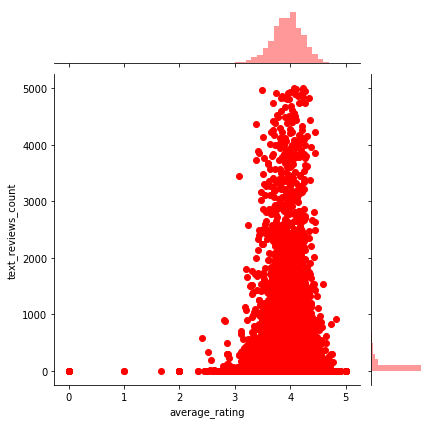

In [66]:
plt.figure(figsize = (15, 10))
df = df.dropna(0)
ax = sns.jointplot(x = 'average_rating', y = 'text_reviews_count', kind = 'scatter', data = tri, color = 'red')

<Figure size 1080x720 with 0 Axes>

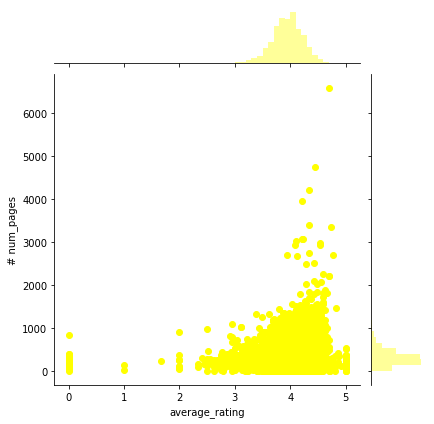

In [67]:
plt.figure(figsize = (15, 10))
ax = sns.jointplot(x = 'average_rating', y = '# num_pages', data = df, color = 'yellow')

In [68]:
tri = df[~(df['# num_pages'] > 1000)]

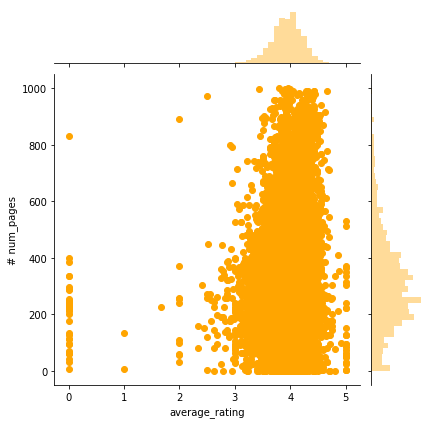

In [69]:
ax = sns.jointplot(x = 'average_rating', y = '# num_pages', data = tri, color = 'orange')

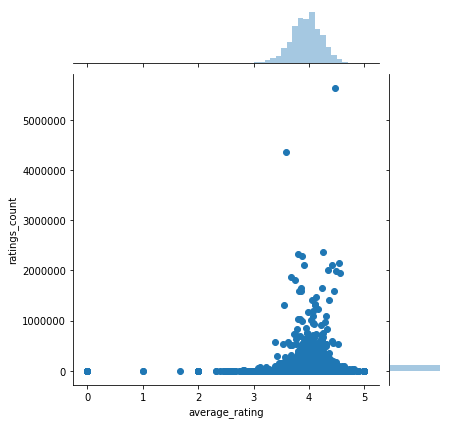

In [70]:
ax = sns.jointplot(x = 'average_rating', y ='ratings_count', data = df)

In [71]:
tri = df[~(df.ratings_count>2000000)]

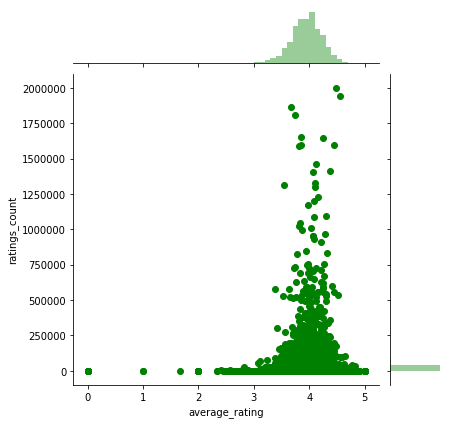

In [72]:
ax = sns.jointplot(x="average_rating", y="ratings_count", data = tri, color = 'green')

In [119]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from matplotlib.lines import Line2D

In [86]:
tri = df[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(tri['average_rating']), np.asarray(tri['ratings_count'])]).T

In [89]:
data[:10]

array([[4.560000e+00, 1.944099e+06],
       [4.490000e+00, 1.996446e+06],
       [4.470000e+00, 5.629932e+06],
       [4.410000e+00, 6.267000e+03],
       [4.550000e+00, 2.149872e+06],
       [4.780000e+00, 3.887200e+04],
       [3.690000e+00, 1.800000e+01],
       [4.730000e+00, 2.741000e+04],
       [4.380000e+00, 3.602000e+03],
       [4.380000e+00, 2.401890e+05]])

In [92]:
Z = data
dis = []
for c in range(2, 30):
    k_means = KMeans(n_clusters = c)
    k_means.fit(Z)
    dis.append(k_means.inertia_)

Text(0.5, 1.0, 'elbow curve')

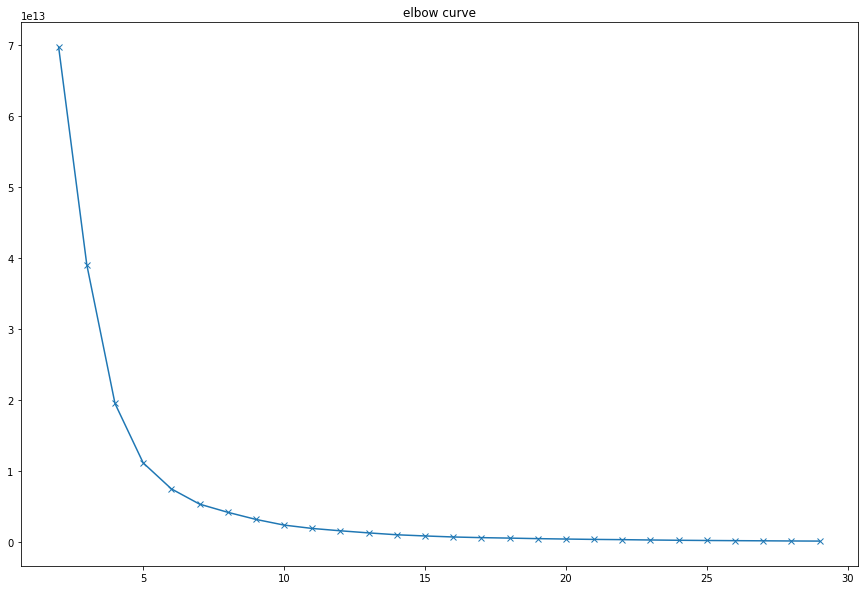

In [97]:
fig = plt.figure(figsize = (15, 10))
plt.plot(range(2, 30), dis, 'x-')
plt.title('elbow curve')

In [104]:
centroids, _ = kmeans(data, 5)

idx, _ = vq(data, centroids)

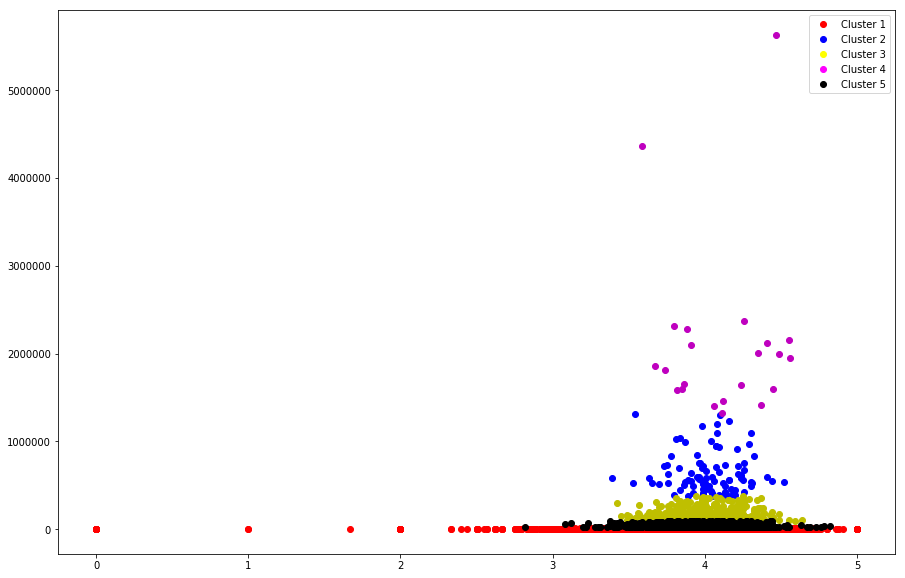

In [122]:
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red
     data[idx==1,0],data[idx==1,1],'ob',#blue
     data[idx==2,0],data[idx==2,1],'oy', #yellow
     data[idx==3,0],data[idx==3,1],'om', #magenta
     data[idx==4,0],data[idx==4,1],'ok',#black
        )
plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )

